In [1]:
from opencage.geocoder import OpenCageGeocode
from pprint import pprint
import pandas as pd
import seaborn as sns
import numpy as np
import wordcloud as wc
import matplotlib.pyplot as plt
import nltk as nl
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import ipywidgets as wgt
from IPython.display import clear_output
from pprint import pprint
%matplotlib inline

key = '83252acd193e4af5928d4c9724af983c'
geocoder = OpenCageGeocode(key)

C:\Users\PMF\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data used

Data was scraped from jobs.ch on 28th of February, 2020. A total of 5622 listings were scraped, with details of job description, employer and location data. Some entries had multiple locations available, and the ones containing locations from more than one canton were tagged as Multiple. Cantons were extracted from scraped locations with OpenCage Geocoder.
There are two main categories - IT and Economy. 

In [2]:
data_all = pd.read_csv("master_ALL_corr_filtered.csv")

In [3]:
data_all["Frequency"] = data_all.groupby(['State', 'Category'])['State'].transform('count')
data_all["Abbr"] = data_all["State"].str[0:3]
data_all.head(10)

,Category,Description,Employer,Location,Multiple,State,Translation,Frequency,Abbr
0,ECON,Praktikant/In Marketing,knecht reisen ag,5210 Windisch,N,Aargau,Intern / in Marketing,183,Aar
1,ECON,PraktikantIn Verkauf/Marketing Tagesausflüge 2020,Eurobus AG,5210 Windisch,N,Aargau,Intern Sales / Marketing Day trips in 2020,183,Aar
2,ECON,Product Manager (m/w) Rivage Flussreisen,Eurobus AG,5210 Windisch,N,Aargau,Product Manager (m / f) Rivage river cruises,183,Aar
3,ECON,Allrounder in der Logistik/Produktion 100% (te...,Job 3000 AG,Aarau,N,Aargau,Rounder in logistics / production 100% (tempor...,183,Aar
4,ECON,HR Business Partner 100% (m/w),Pneu Egger AG,Aarau,N,Aargau,HR Business Partner 100% (w / w),183,Aar
5,ECON,HR-Businesspartner (80-100%) m/w,DELIGO AG,Aarau,N,Aargau,HR-Business Partner (80-100%) m / w,183,Aar
6,ECON,IT-Prozessmanager Kundenservice und Dienstleis...,AEW Energie AG,Aarau,N,Aargau,IT Process Manager Customer Services and 80-10...,183,Aar
7,ECON,IT-Prozessmanager Strom 80 - 100 % (m/w),AEW Energie AG,Aarau,N,Aargau,IT Process Manager current 80-100% (w / w),183,Aar
8,ECON,"Leiter Eventproduktion, 100%",Zeitpol AG,Aarau,N,Aargau,"Head of Event Production, 100%",183,Aar
9,ECON,Logistiker EFZ/EBA 100%,Job 3000 AG,Aarau,N,Aargau,Logisticians EFZ / EBA 100%,183,Aar


# Job distribution per States

IT listings for Zurich are lower than expected, even though the actual state is much higher (see Job listings for IT on jobs.ch when it comes to Zurich). Initially, about 800 records were scraped (200 less than economy listings), but due to duplicate clearing and the fact that many IT jobs have multiple locations listed, the number in the histogram is much lower than expected. Other than Zurich - Bern, Basel have the highest number of records. Overall, both categories seem to be evenly distributed and follow the same trend of frequency (according to this collected data).

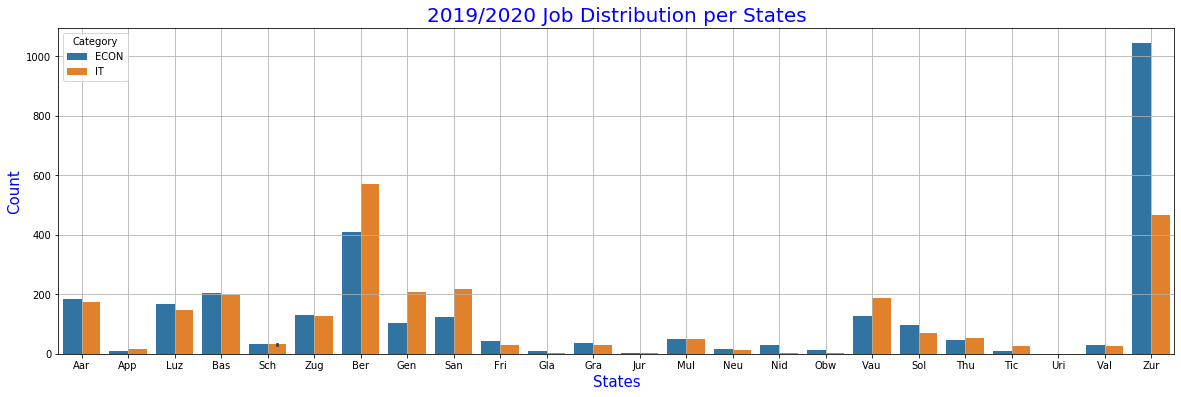

In [4]:
job_freq_state = pd.DataFrame({
    "State": data_all["Abbr"],
    "Frequency": data_all["Frequency"],
    "Category": data_all["Category"]
})

f, ax1 = plt.subplots(figsize =(20,6))
sns.barplot(x="State", y="Frequency", hue="Category", data=job_freq_state)

plt.xlabel('States', fontsize = 15, color='blue')
plt.ylabel('Count', fontsize = 15, color='blue')
plt.title('2019/2020 Job Distribution per States', fontsize = 20, color='blue')

plt.grid()
plt.show()

In [5]:
jobs_it = data_all[(data_all["Category"] == "IT")]
jobs_econ = data_all[(data_all["Category"] == "ECON")]

# Keyword frequencies for IT listings

These can be looked at per Cantons/States. There are small variations in medium frequencies, but large frequencies (the biggest words) lead to a conclusion that most of application development is centered around building business solutions, especially in conjuction with SAP ERP systems especially. A lot of listings call for a Java developer, and it is in fact a leading programming language in IT industry according to this data, with .NET platform languages being a close second (and first in some Cantons). Most common sought after applications are Web applications. Full-stack web programmers are leading in demand, but a front-end programmer is a close second. Back-end only programmers are few and in between. Senior programmers have a lot of advantage, but juniors can easily find some jobs for themselves. Most of them, however, do not list their desired seniority level, which puts the majority of listings in "Intermediate" category based on collected data.

Dropdown(description='Canton:', index=8, options=('Schaffhausen', 'Fribourg', 'Jura', 'Neuchâtel', 'Ticino', '…

Total listings:  2676
Total number of results:  465
Job percentage:  17.38%


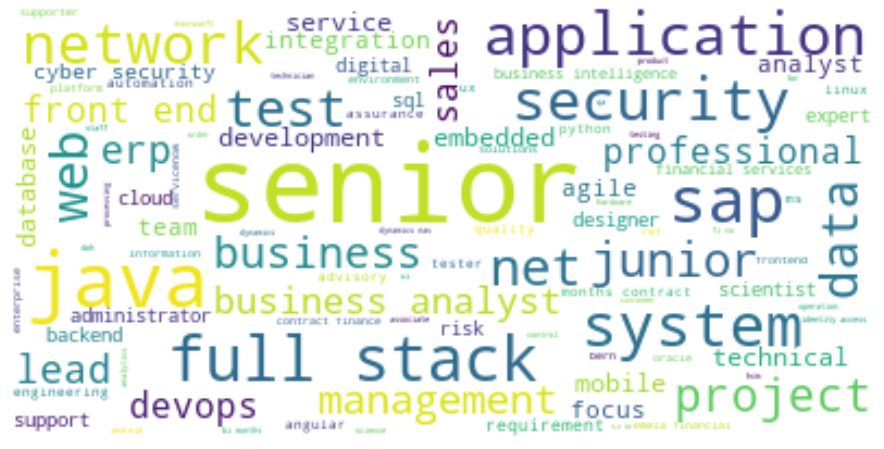

In [6]:
optlist_i = list(set(list(jobs_it["State"])))
w_i = wgt.Dropdown(
    options=optlist_i,
    value='Ticino',
    description='Canton:',
)

def on_change(change):  
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(w_i)
        c = change['new']    
        jobs_fr = jobs_it[(jobs_it["State"] == c)]
        
        query = ""
        freq = 0
        
        for t in jobs_fr.Translation:
            st = t.split()
            freq+=1
            for s in st:
                query+=" "+s.lower()
        
        full_per = round(freq/len(jobs_it)*100, 2)
        
        print("Total listings: ", len(jobs_it))
        print("Total number of results: ", freq)
        print("Job percentage: ", str(full_per)+"%")
        
        stopwords = set(wc.STOPWORDS)
        stopwords.update(["developer", "software", "engineer", 
                          "architect", 
                          "specialist", "consultant", "manager", 
                          "woman", "frau", "man", "st", "gallen", 
                          "month", "abacus", "apprenticeship", 
                          "internship", "ict", "technology", 
                          "lucerne", "solution", "computer", 
                          "lugano", "position", "part", 
                          "time", "paccot", "buochs", "ag", 
                          "sick", "reinach", "gümligen", 
                          "powers", "chur", "switzerland", "lausanne",
                          "tourist", "tender", "honest", "hes", 
                          "haute", "neuchatel", "ecole", "june", 
                          "invitation", "flair", "sursee", "brig", "developers", c.lower()])
        wordcloud = wc.WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(query)
        # Display the generated image:
        f, ax1 = plt.subplots(figsize =(27,8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

w_i.observe(on_change)
display(w_i)

# Keyword frequencies for economy listings

These can also be looked at by States/Cantons. Largest word frequencies for a lot of Cantons seem to be centered around marketing listings, followed closely by product and project management and HR. Seniors are also in high demand, but juniors can find something for themselves. Most of the jobs, however, follow the same path as IT listings, in that most of them are in Intermediate bracket. Depending on the canton, Tourism and Gastro is more or less a medium frequency category, with most of the listings falling within restaurants, travel agencies or event planning.

Dropdown(description='Canton:', index=8, options=('Schaffhausen', 'Fribourg', 'Jura', 'Neuchâtel', 'Ticino', '…

Total listings:  2946
Total number of results:  1043
Job percentage:  35.4%


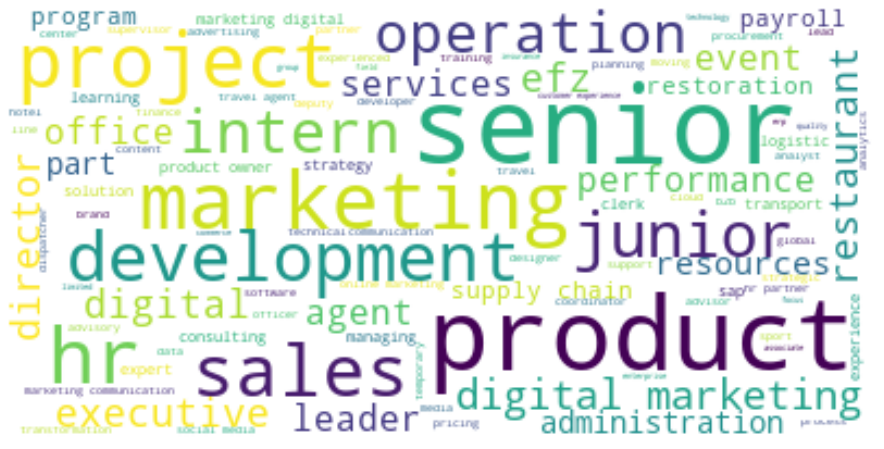

In [7]:
optlist_e = list(set(list(jobs_econ["State"])))
w_e = wgt.Dropdown(
    options=optlist_e,
    value='Ticino',
    description='Canton:',
)

def on_change(change):  
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(w_e)
        c = change['new']    
        jobs_fr = jobs_econ[(jobs_econ["State"] == c)]
        
        query = ""
        freq = 0
        
        for t in jobs_fr.Translation:
            st = t.split()
            freq += 1
            for s in st:
                query+=" "+s.lower()
                
        full_per = round(freq/len(jobs_econ)*100, 2)
        
        print("Total listings: ", len(jobs_econ))
        print("Total number of results: ", freq)
        print("Job percentage: ", str(full_per)+"%")
        stopwords = set(wc.STOPWORDS)
        stopwords.update(["service", "assistant", "business", "head", "internship",
                          "specialist", "consultant", "manager", "management", "engineer", "apprenticeship",
                          "st", "gallen", "lucerne", "employee", "woman", "frau", "man", "grafenort", "kaiserstuhl",
                          "heat", "switzerland", "workshop", "mann", "time", "learners", "employees", "human",
                          "team", "wanted", "murten", "staff", "electrical", "installations", "friborg", "trainee",
                          "chur", "months", "water", "professional", "professionals", "people", "success", "factor",
                          "skilled", "life", "personnel", c.lower()])
        
        wordcloud = wc.WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(query)
        # Display the generated image:
        f, ax1 = plt.subplots(figsize =(27,8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
             
w_e.observe(on_change)
display(w_e)

# Most common keywords in IT listings

This graph is a more generalized representation of keywords in IT listings than the graph from before. Total number of records for IT listings is 2676. This means that senior level jobs take up about 16% of all job listings, whereas junior takes up around 4%. 81% of jobs are in intermediate bracket. The rest of the common words mostly follow trends per Cantons.

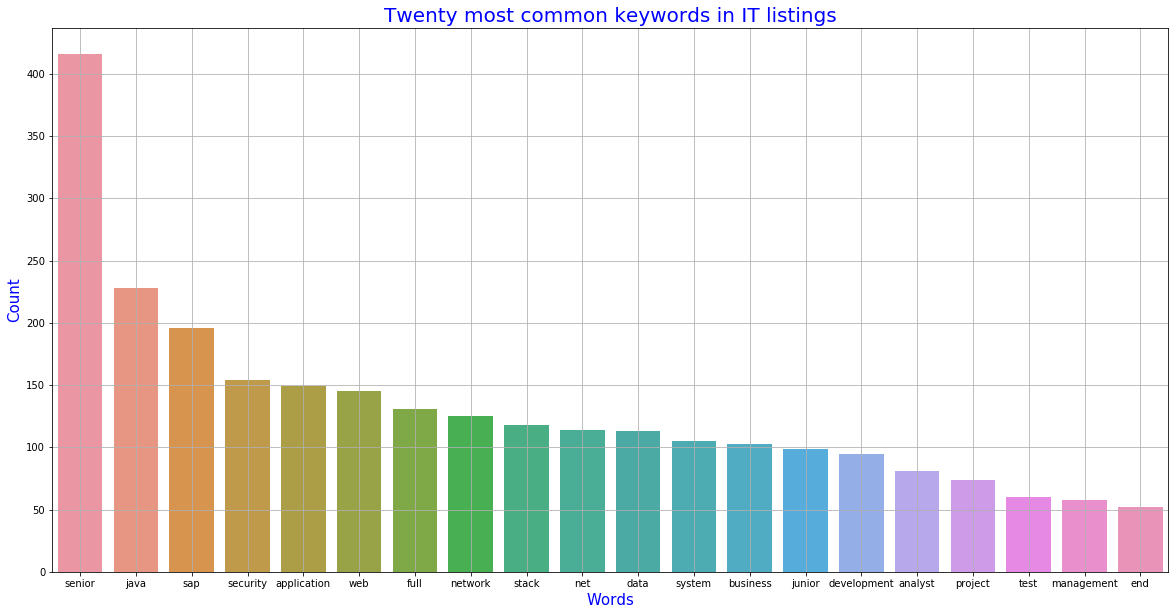

In [8]:
df = " ".join(list(jobs_it[['Translation']].apply(lambda x: ' '.join(x), axis = 1))).lower()
stop_words = nl.corpus.stopwords.words('english')
list_i = ["developer", "software", "engineer", 
                          "architect",
                          "specialist", "consultant", "manager", 
                          "woman", "frau", "man", "st", "gallen", 
                          "month", "abacus", "apprenticeship", 
                          "internship", "ict", "technology", 
                          "lucerne", "solution", "computer", 
                          "lugano", "position", "part", 
                          "time", "paccot", "buochs", "ag", 
                          "sick", "reinach", "gümligen", 
                          "powers", "chur", "switzerland", "lausanne",
                          "tourist", "tender", "honest", "hes", 
                          "haute", "neuchatel", "ecole", "june", 
                          "invitation", "flair", "sursee", "brig", "developers"]
list_s = list(set(list(jobs_it["State"])))
list_i.extend(list_s)
stop_words.extend(list_i)

tokenizer = RegexpTokenizer(r"[a-zA-z]+")
word_tokens = tokenizer.tokenize(df)

filtered_sentence = [w for w in word_tokens if not w in stop_words and len(w)>1] 

mostCommon = nl.FreqDist(filtered_sentence).most_common(20)
dfMostCommon = pd.DataFrame({
    "comm": [mostCommon[i][0] for i in range(len(mostCommon))],
    "freq": [mostCommon[j][1] for j in range(len(mostCommon))]
})


f, ax1 = plt.subplots(figsize =(20,10))
sns.barplot(x="comm", y="freq", data=dfMostCommon)

plt.xlabel('Words', fontsize = 15, color='blue')
plt.ylabel('Count', fontsize = 15, color='blue')
plt.title('Twenty most common keywords in IT listings', fontsize = 20, color='blue')

plt.grid()
plt.show()

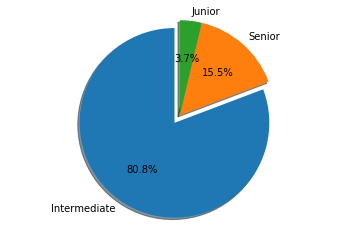

In [9]:
labels = ["Intermediate", "Senior", "Junior"]
sizes = [2676-416-99, 416, 99]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

# Most common keywords in economy listings

This graph is also a more generalized representation of keywords in economy listings. Total number of records for IT listings is 2946. This means that senior level jobs take up about 8% of all job listings, whereas junior takes up around 2%. 92% of jobs are in intermediate bracket. The rest of the common words mostly follow trends per Cantons.

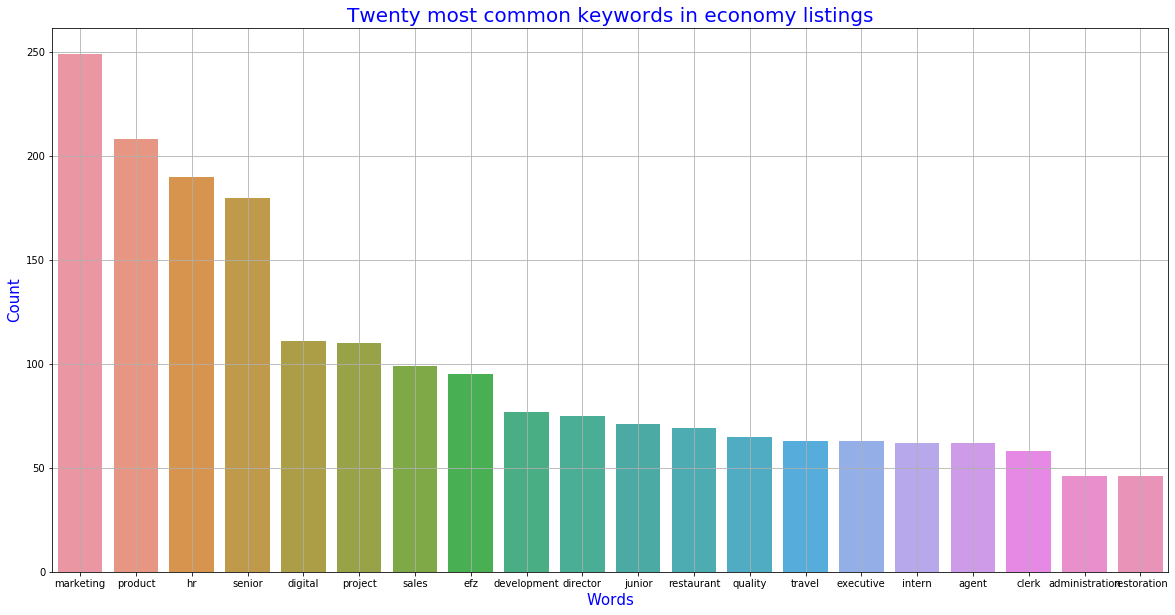

In [10]:
df = " ".join(list(jobs_econ[['Translation']].apply(lambda x: ' '.join(x), axis = 1))).lower()
stop_words = nl.corpus.stopwords.words('english')
list_e = ["service", "assistant", "business", "head", "internship",
                          "specialist", "consultant", "manager", "management", "engineer", "apprenticeship",
                          "st", "gallen", "lucerne", "employee", "woman", "frau", "man", "grafenort", "kaiserstuhl",
                          "heat", "switzerland", "workshop", "mann", "time", "learners", "employees", "human",
                          "team", "wanted", "murten", "staff", "electrical", "installations", "friborg", "trainee",
                          "chur", "months", "water", "professional", "professionals", "people", "success", "factor",
                          "skilled", "life", "personnel", "zurich"]

list_s = list(set(list(jobs_econ["State"])))
list_e.extend(list_s)
stop_words.extend(list_e)

tokenizer = RegexpTokenizer(r"[a-zA-z]+")
word_tokens = tokenizer.tokenize(df)

filtered_sentence = [w for w in word_tokens if not w in stop_words and len(w)>1] 

mostCommon = nl.FreqDist(filtered_sentence).most_common(20)
dfMostCommon = pd.DataFrame({
    "comm": [mostCommon[i][0] for i in range(len(mostCommon))],
    "freq": [mostCommon[j][1] for j in range(len(mostCommon))]
})


f, ax1 = plt.subplots(figsize =(20,10))
sns.barplot(x="comm", y="freq", data=dfMostCommon)

plt.xlabel('Words', fontsize = 15, color='blue')
plt.ylabel('Count', fontsize = 15, color='blue')
plt.title('Twenty most common keywords in economy listings', fontsize = 20, color='blue')

plt.grid()
plt.show()

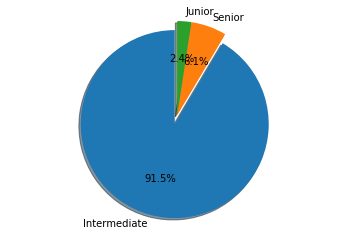

In [11]:
labels = ["Intermediate", "Senior", "Junior"]
sizes = [2946-180-71, 180, 71]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

# Frequency of jobs with particular languages

The list of the languages that the records are compared with belong to my personal arsenal of skills. This shows the frequency of languages I'm skilled or familiar with, with .NET languages encompassing mostly C# and more commonly used languages from .NET platform.

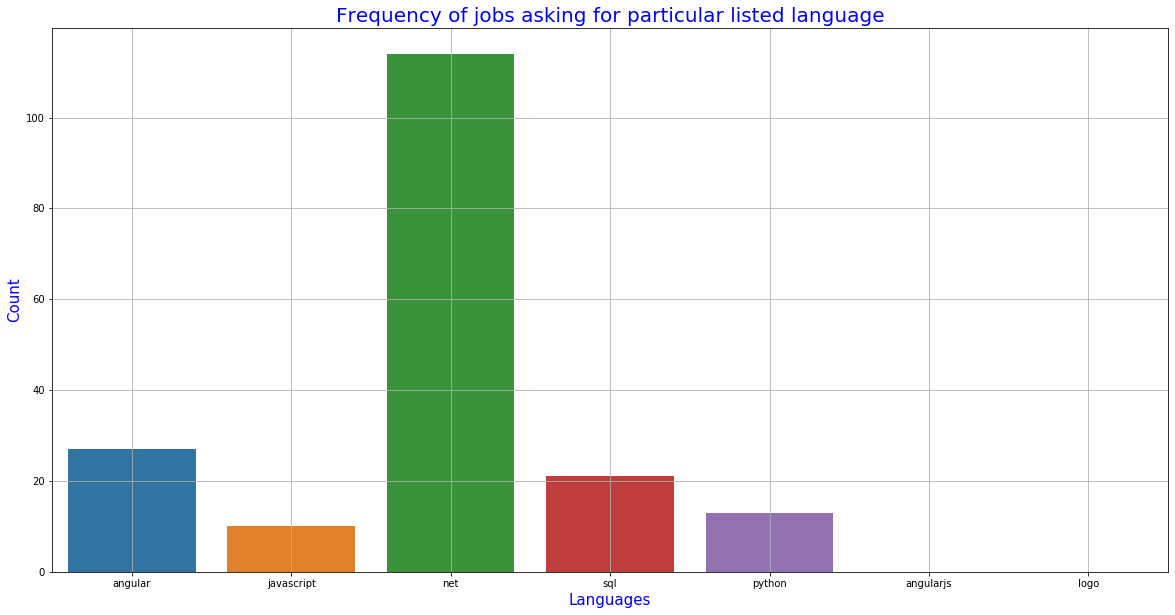

In [12]:
df = " ".join(list(jobs_it[['Translation']].apply(lambda x: ' '.join(x), axis = 1))).lower()
plang = ["net", "javascript", "angular", "angularjs", "python", "sql", "logo",]
word_tokens = tokenizer.tokenize(df)
filtered = {}
for w in word_tokens:
    if w in plang:
        if w in filtered:
            filtered[w]+=1
        else:
            filtered[w]=1

for p in plang:
    if p not in filtered:
        filtered[p]=0

plang_freq=pd.DataFrame({
    "lang": [key for key in filtered.keys()],
    "freq": [filtered[key] for key in filtered.keys()]
})

f, ax1 = plt.subplots(figsize =(20,10))
sns.barplot(x="lang", y="freq", data=plang_freq)

plt.xlabel('Languages', fontsize = 15, color='blue')
plt.ylabel('Count', fontsize = 15, color='blue')
plt.title('Frequency of jobs asking for particular listed language', fontsize = 20, color='blue')

plt.grid()
plt.show()

# Comparing world trends in programming languages with Switzerland trends

Below there are two pie charts showing worldwide popular programming languages for 2019 and 2020 (https://pypl.github.io/PYPL.html). 

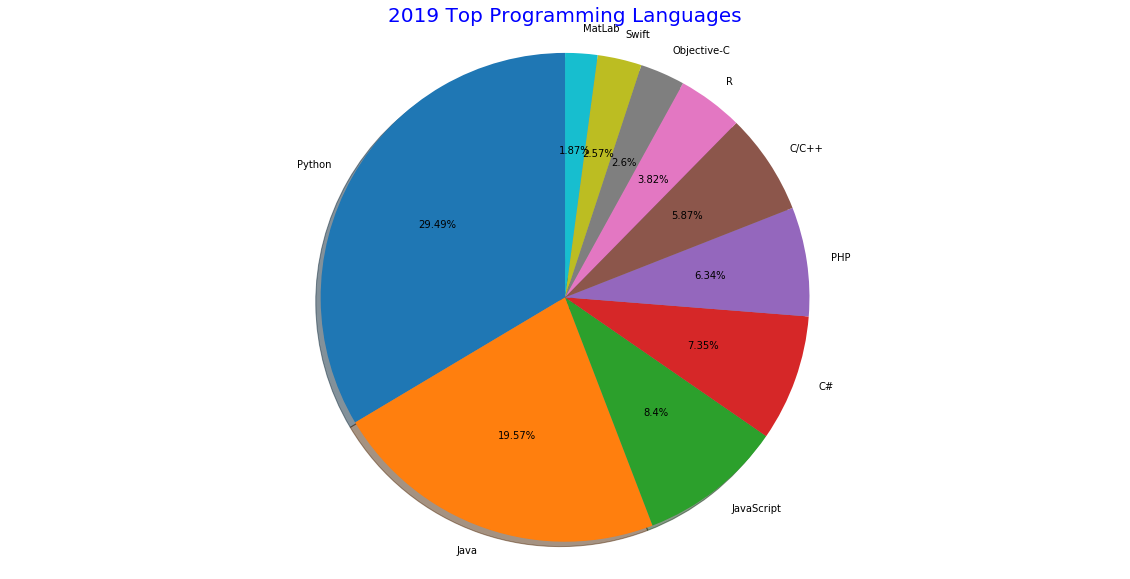

In [13]:
labels = ["Python", "Java", "JavaScript", "C#", "PHP", "C/C++",
         "R", "Objective-C", "Swift", "MatLab"]
sizes = np.array([29.49, 19.57, 8.4, 7.35, 6.34, 5.87, 3.82, 2.6, 2.57, 1.87])

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return str(a)+"%"

fig1, ax1 = plt.subplots(figsize =(20,10))
ax1.pie(sizes, labels=labels, autopct=absolute_value,
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('2019 Top Programming Languages', fontsize = 20, color='blue')
plt.show()

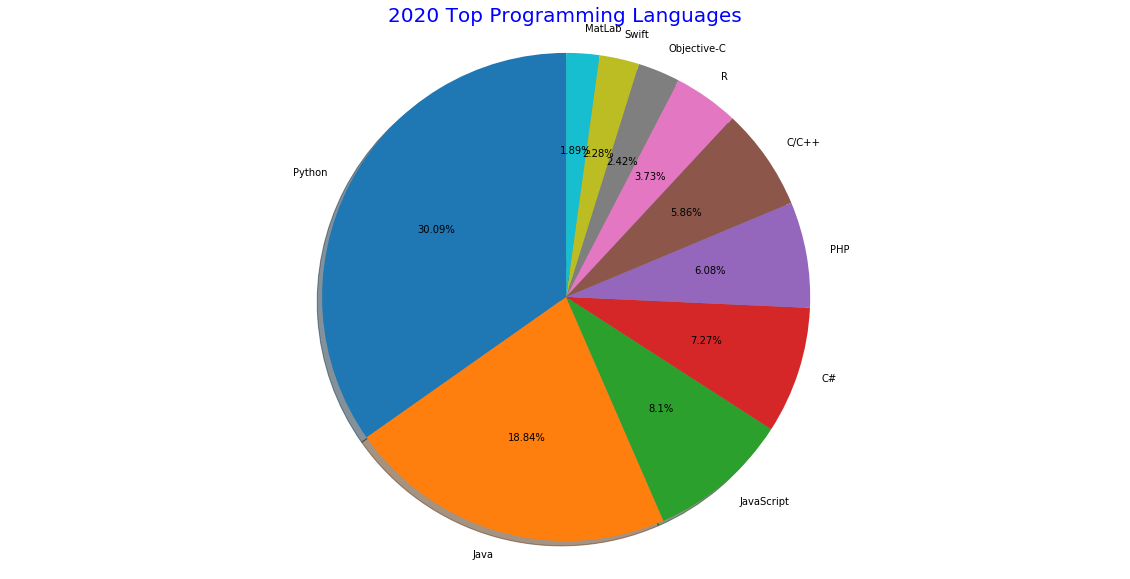

In [14]:
labels = ["Python", "Java", "JavaScript", "C#", "PHP", "C/C++",
         "R", "Objective-C", "Swift", "MatLab"]
sizes = np.array([30.09, 18.84, 8.1, 7.27, 6.08, 5.86, 3.73, 2.42, 2.28, 1.89])

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return str(a)+"%"

fig1, ax1 = plt.subplots(figsize =(20,10))
ax1.pie(sizes, labels=labels, autopct=absolute_value,
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('2020 Top Programming Languages', fontsize = 20, color='blue')
plt.show()

When top two graphs are compared with Swiss trends, we can see that the dominant languages are still Java and languages of the .NET platform (C/C++/C#/etc.). Rest of the languages are few and in between, although data may be incomplete due to the fact that the language data was extracted from short descriptions from each listing. Further testing might show different results.

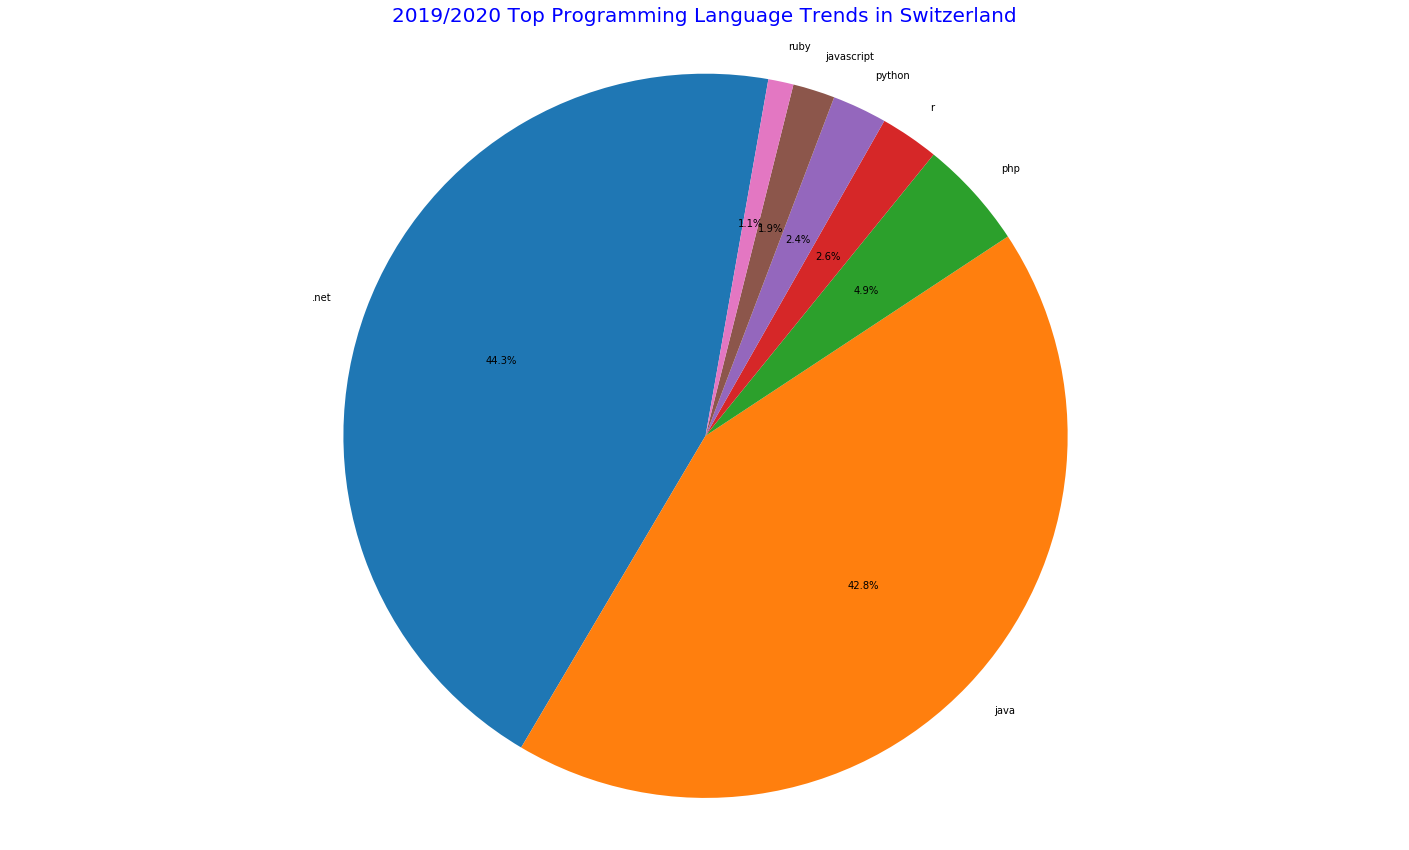

In [15]:
df = " ".join(list(jobs_it[['Translation']].apply(lambda x: ' '.join(x), axis = 1))).lower()

plangs = pd.read_csv("programming-languages.csv")
plangs["name-low"] = [p.lower() for p in plangs.name]
plang = list(plangs["name-low"])

word_tokens = tokenizer.tokenize(df)
filtered = {}
for w in word_tokens:
    w=w.lower()
    
    if w == "net" or w=="c":
        if ".net" in filtered:
            filtered[".net"]+=1
        else:
            filtered[".net"]=1
             
    elif w in plang and w not in ["w", "f", "d", "e", "g", 
                                "s", "j", "t", "focus", "ml", 
                               "sr", "bc", "ch", "nice", 
                               "processing", "abap", "id",
                               "arc", "self", "code", "plus",
                                "chef", "chain", "red", "sas"]:
        if w in filtered:
            filtered[w]+=1
        else:
            filtered[w]=1
    

plang_freq=pd.DataFrame({
    "lang": [key for key in filtered.keys() if filtered[key]>3],
    "freq": [filtered[key] for key in filtered.keys() if filtered[key]>3]
})

plang_freq = plang_freq.sort_values(by=['freq'], ascending=False)

labels = list(plang_freq["lang"])
sizes = list(plang_freq["freq"])

fig1, ax1 = plt.subplots(figsize =(25,15))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=80)
ax1.axis('equal')  
plt.title('2019/2020 Top Programming Language Trends in Switzerland', fontsize = 20, color='blue')
plt.show()

# Multiple Location Availability

Some listings were offering multiple locations for their job position offers. Per state, biggest amount of multiple-location listings belongs to Bern, and the second biggest is Zurich. Third biggest amount is "Multiple" category, which is non-deterministic category where employers are asking to fill positions all around Switzerland or a special Switzerland region, making it impossible to pinpoint exactly which location they are asking for.
Per category, as expected, IT listings have more multiple-location availability than economy listings.

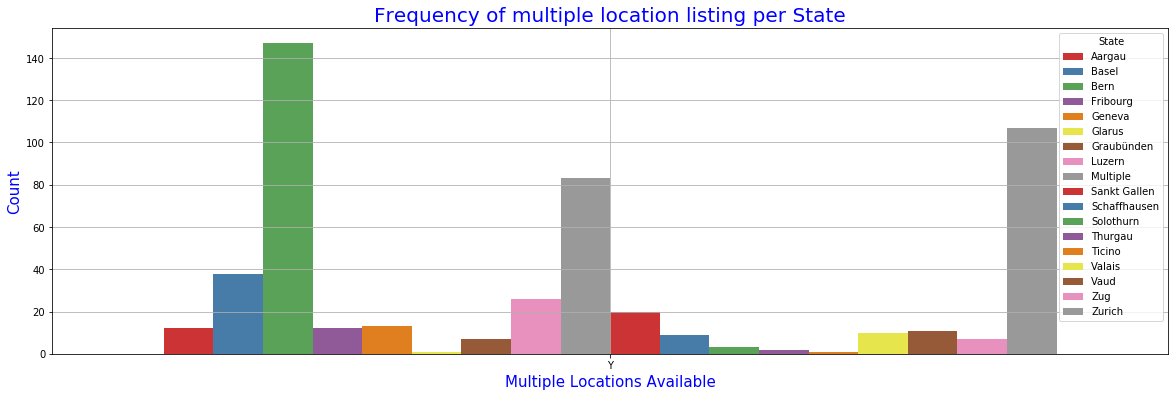

In [16]:
multi = {'Y': 1,'N': 0}
data_all["MultipleBin"] = [multi[item] for item in data_all.Multiple]
multi_freq = data_all[(data_all["MultipleBin"] == 1)]

f, ax1 = plt.subplots(figsize =(20,6))
sns.countplot(x="Multiple", hue="State", palette="Set1", data=multi_freq)
plt.xlabel('Multiple Locations Available', fontsize = 15, color='blue')
plt.ylabel('Count', fontsize = 15, color='blue')
plt.title('Frequency of multiple location listing per State', fontsize = 20, color='blue')

plt.grid()
plt.show()

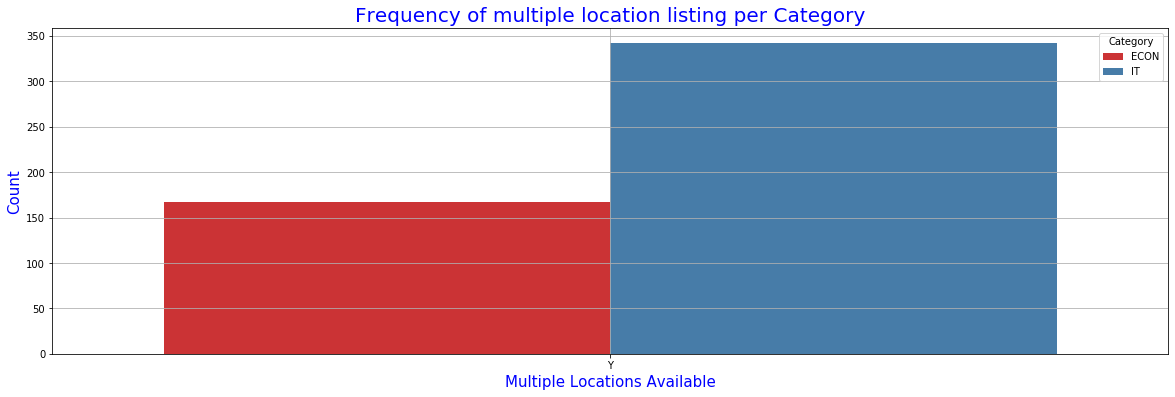

In [17]:
f, ax1 = plt.subplots(figsize =(20,6))
sns.countplot(x="Multiple", hue="Category", palette="Set1", data=multi_freq)
plt.xlabel('Multiple Locations Available', fontsize = 15, color='blue')
plt.ylabel('Count', fontsize = 15, color='blue')
plt.title('Frequency of multiple location listing per Category', fontsize = 20, color='blue')

plt.grid()
plt.show()